In [4]:
import pandas as pd
import numpy as np

## Importing and Problem Understanding

In [5]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.shape

(10000, 14)

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer. There are 10000 records and 14 columns.

In this project we will predict the column **Exited** to see if a customer is left the bank (1) or continues to be a customer (0).

## Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

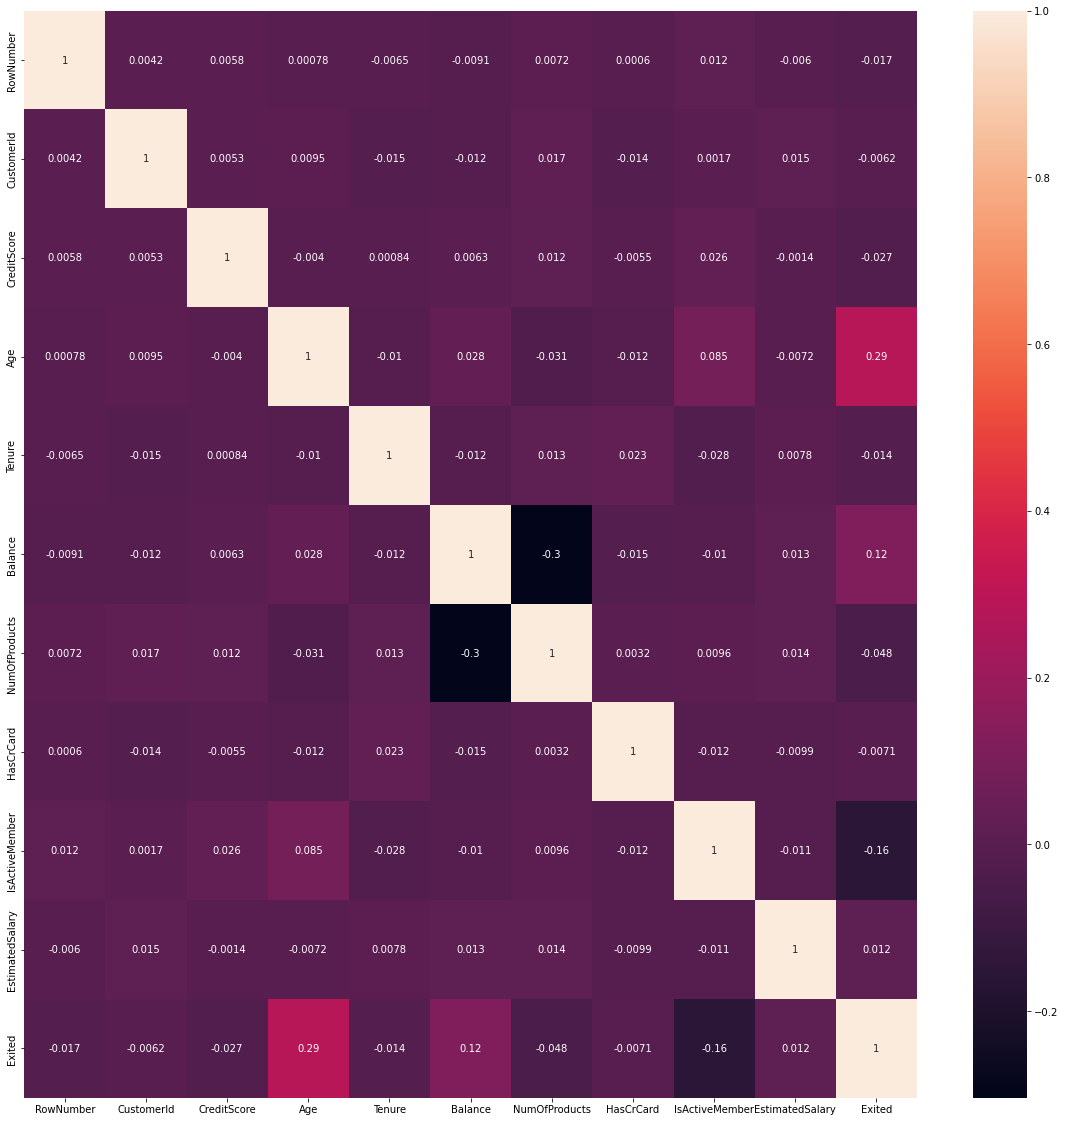

In [ ]:
plt.figure(figsize=(20,20))
churn_corr = df.corr()
churn_corr_top = churn_corr.index
sns.heatmap(df[churn_corr_top].corr(), annot=True)

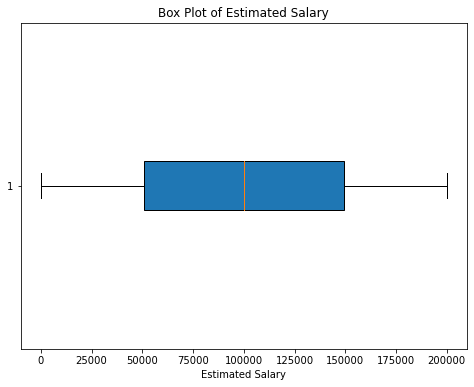

In [ ]:
estimated_salary_data = df['EstimatedSalary']

plt.figure(figsize=(8, 6))
plt.boxplot(estimated_salary_data, vert=False, patch_artist=True)

plt.xlabel('Estimated Salary')
plt.title('Box Plot of Estimated Salary')

plt.show()

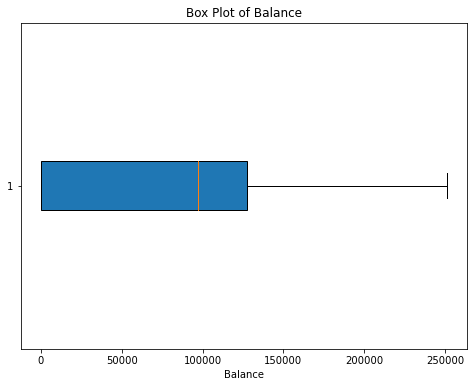

In [ ]:
balance_data = df['Balance']

plt.figure(figsize=(8, 6))
plt.boxplot(balance_data, vert=False, patch_artist=True)

plt.xlabel('Balance')
plt.title('Box Plot of Balance')

plt.show()

This boxplot might show that **Balance** Variable is skewed.

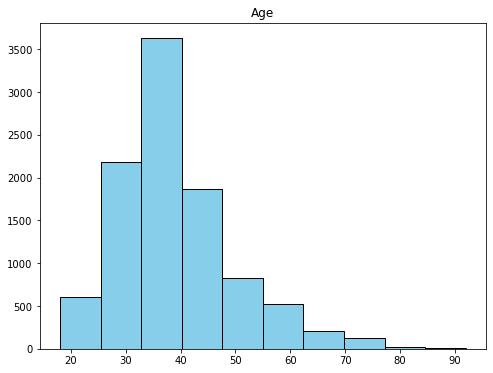

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age')
plt.show()

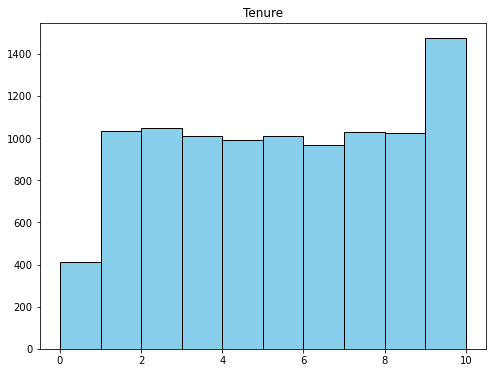

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(df['Tenure'], bins=10, color='skyblue', edgecolor='black')
plt.title('Tenure')
plt.show()

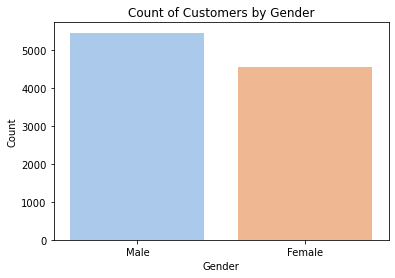

In [ ]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel")

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Customers by Gender')

plt.show()

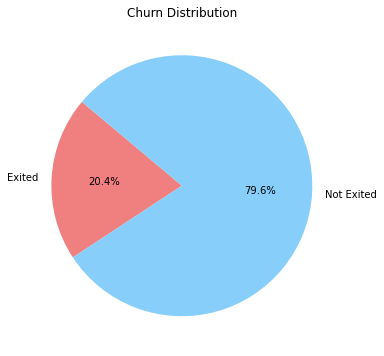

In [ ]:
labels = ['Exited', 'Not Exited']
sizes = [df['Exited'].sum(), len(df) - df['Exited'].sum()]

colors = ['lightcoral', 'lightskyblue']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.title('Churn Distribution')
plt.show()

There are a quite difference in target part with approximately 2:8 ratio, I will reconsider this later in the model

## Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

Removing these column because:
1. RowNumber is redundant because there is indexing.
2. CustomerId and Surname did not help any way in the model.

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.isnull().any().any()

False

According to this code the dataset doesn't have any missing value, but keep in mind there might be missing value with different label, so after this we will check each variable.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


All the variable are in the right data type

Next is to check each variable, starting with the categorical

In [ ]:
print(df['Geography'].unique())

['France' 'Spain' 'Germany']


In [ ]:
print(df['Gender'].unique())

['Female' 'Male']


Now with the numerical and boolean variable

In [ ]:
print(df['Tenure'].unique())

[ 2  1  8  7  4  6  3 10  5  9  0]


In [ ]:
print(df['Age'].unique())

[42 41 39 43 44 50 29 27 31 24 34 25 35 45 58 32 38 46 36 33 40 51 61 49
 37 19 66 56 26 21 55 75 22 30 28 65 48 52 57 73 47 54 72 20 67 79 62 53
 80 59 68 23 60 70 63 64 18 82 69 74 71 76 77 88 85 84 78 81 92 83]


In [ ]:
print(df['NumOfProducts'].unique())

[1 3 2 4]


In [ ]:
print(df['HasCrCard'].unique())

[1 0]


In [ ]:
print(df['IsActiveMember'].unique())

[1 0]


In [ ]:
print(df['Exited'].unique())

[1 0]


It seems like all the variable is good.
In XGBoost its usually turning the data into '0' for missing value but in this project I dont have that problem.
We have 10 Independent variable to predict 1 Dependant Variable(Exited).

## Data Preparation

We split the dataset first, and then do one-hot encoding after to prevent data leakage

### Splitting into X and y

In [7]:
X = df.drop('Exited',axis=1).copy()
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y = df['Exited'].copy()
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

### One-hot Encoding

We only need to One-hot encode the categorical variable.

In [9]:
X_encoded = pd.get_dummies(X, columns=['Geography','Gender'])
X_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


## XGBoost Model

In [10]:
sum(y)/len(y)

0.2037

As we can see from the data visualization and we check here again, the data is imbalance, so we split it using stratification

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y, test_size=0.2, random_state=777,stratify=y)

In [13]:
X_train.shape

(8000, 13)

In [ ]:
y_train.shape

(8000,)

In [ ]:
X_test.shape

(2000, 13)

In [ ]:
y_test.shape

(2000,)

In [ ]:
sum(y_train)/len(y_train)

0.20375

In [ ]:
sum(y_test)/len(y_test)

0.2035

The already splitted into training and testing, thus ready for the XGBoost Model.

In [14]:
import xgboost

Optimizing Parameter using RandomizedSearchCV

In [15]:
params = {
    "max_depth": [3, 4, 5, 6, 8, 10, 12, 15],
    "learning_rate": [0.5, 0.10, 0.15, 0.20, 0.25, 0.30],
    "min_child_weight": [1, 3, 5, 7],
    "gamma": [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.7]
}

In [16]:
from sklearn.model_selection import RandomizedSearchCV

In [17]:
xgb_init = xgboost.XGBClassifier()

In [18]:
random_cv = RandomizedSearchCV(xgb_init, param_distributions=params, n_iter=5, scoring="roc_auc", n_jobs=1, cv=5, verbose=3)

In [19]:
random_cv.fit(X_encoded, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=7;, score=0.861 total time=   0.1s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=7;, score=0.868 total time=   0.1s
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=7;, score=0.857 total time=   0.1s
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=7;, score=0.865 total time=   0.1s
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=7;, score=0.855 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.5, max_depth=12, min_child_weight=7;, score=0.817 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.5, max_depth=12, min_child_weight=7;, score=0.843 total time=   0.2s
[CV 3/5] END colsample_bytre

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.5, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [20]:
random_cv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [21]:
random_cv.best_params_

{'min_child_weight': 7,
 'max_depth': 5,
 'learning_rate': 0.2,
 'gamma': 0.3,
 'colsample_bytree': 0.3}

In [26]:
xgb_classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                                       colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=1, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.1, gpu_id=-1,
              grow_policy=None, importance_type='gain',
              interaction_constraints='', learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=3, max_leaves=None, min_child_weight=1, missing=1,
              monotone_constraints='()', multi_strategy=None, n_estimators=100,
              n_jobs=0, num_parallel_tree=1, ...)

## Evaluating Model

In [24]:
from sklearn.model_selection import cross_val_score

In [ ]:
X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
3452,757,57,3,89079.41,1,1,1,53179.21,1,0,0,0,1
9679,472,19,9,0.00,2,1,0,3453.40,1,0,0,0,1
9399,694,39,5,77652.40,1,1,1,25407.59,1,0,0,0,1
2613,630,26,7,129837.72,2,0,1,197001.15,1,0,0,0,1
1383,571,23,10,151097.28,1,0,1,17163.75,1,0,0,1,0


In [28]:
y_pred = xgb_classifier.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Confusion Matrix:")
print(cm)


Accuracy: 0.86
Precision: 0.74
Recall: 0.49
F1-Score: 0.59
Confusion Matrix:
[[1524   69]
 [ 206  201]]
